In [16]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter

from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [17]:
import pandas as pd
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [21]:
y = df['TenYearCHD']
X = df.drop('TenYearCHD',axis=1)
# Handle missing values (replace with mean for simplicity)
X.fillna(X.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

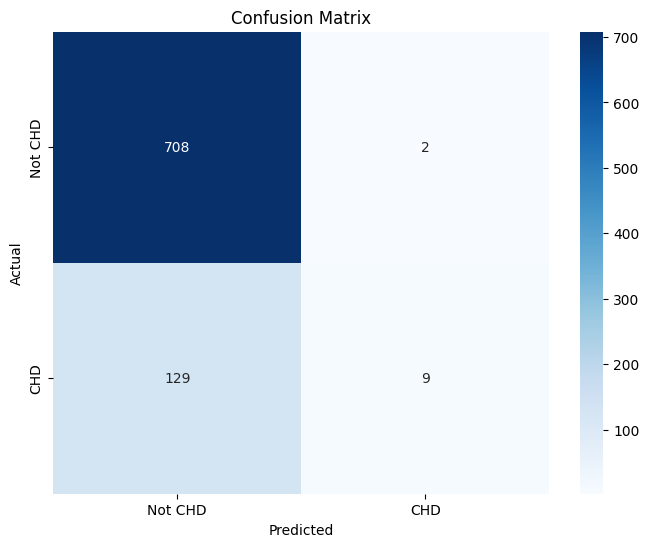

In [24]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, lr_predict)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Not CHD', 'CHD'], columns=['Not CHD', 'CHD'])

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [25]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, lr_predict))

# Print accuracy score
print(f"Accuracy Score: {accuracy_score(y_test, lr_predict):.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       710
           1       0.82      0.07      0.12       138

    accuracy                           0.85       848
   macro avg       0.83      0.53      0.52       848
weighted avg       0.84      0.85      0.79       848

Accuracy Score: 0.85


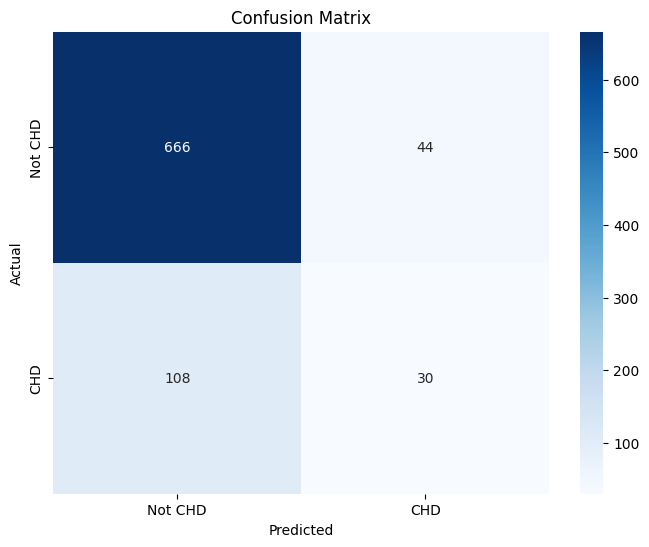

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       710
           1       0.41      0.22      0.28       138

    accuracy                           0.82       848
   macro avg       0.63      0.58      0.59       848
weighted avg       0.79      0.82      0.80       848

Accuracy Score: 0.82


In [35]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, nbpred)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Not CHD', 'CHD'], columns=['Not CHD', 'CHD'])

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Print classification report
print("Classification Report:")
print(classification_report(y_test, nbpred))

# Print accuracy score
print(f"Accuracy Score: {accuracy_score(y_test, nbpred):.2f}")

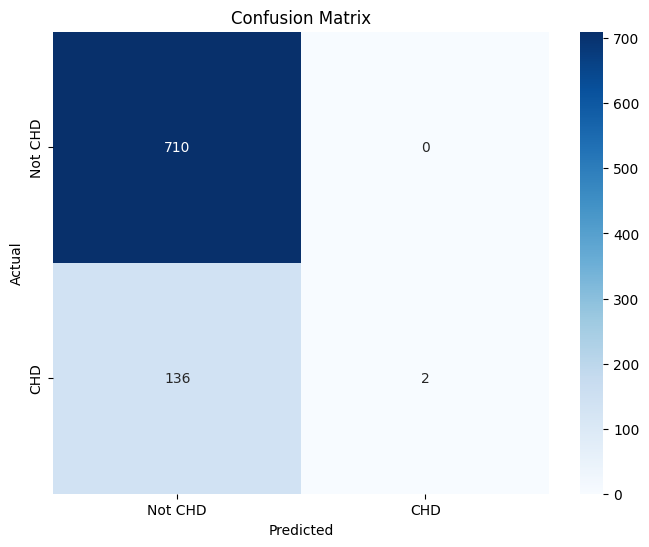

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       710
           1       1.00      0.01      0.03       138

    accuracy                           0.84       848
   macro avg       0.92      0.51      0.47       848
weighted avg       0.87      0.84      0.77       848

Accuracy Score: 0.84


In [32]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)

cm = confusion_matrix(y_test, rf_predicted)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Not CHD', 'CHD'], columns=['Not CHD', 'CHD'])

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Print classification report
print("Classification Report:")
print(classification_report(y_test, rf_predicted))

# Print accuracy score
print(f"Accuracy Score: {accuracy_score(y_test, rf_predicted):.2f}")


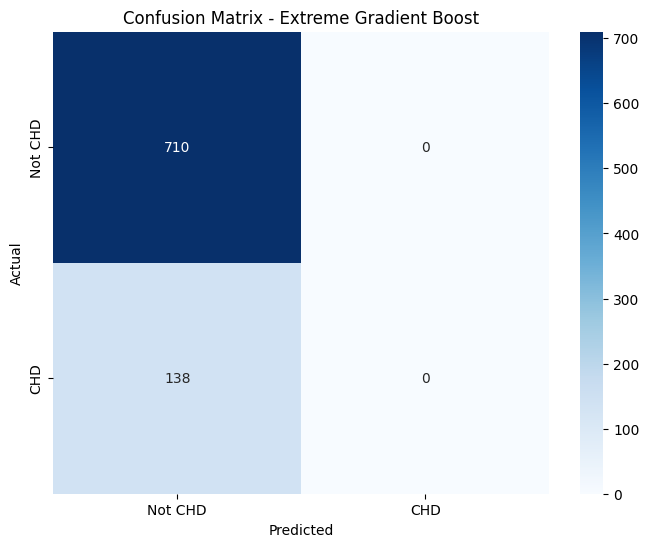

Classification Report - Extreme Gradient Boost:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       710
           1       0.00      0.00      0.00       138

    accuracy                           0.84       848
   macro avg       0.42      0.50      0.46       848
weighted avg       0.70      0.84      0.76       848

Accuracy Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)

# Compute the confusion matrix
cm_xgb = confusion_matrix(y_test, xgb_predicted)

# Create a DataFrame for the confusion matrix
cm_xgb_df = pd.DataFrame(cm_xgb, index=['Not CHD', 'CHD'], columns=['Not CHD', 'CHD'])

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm_xgb_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Extreme Gradient Boost')
plt.show()
# Print classification report
print("Classification Report - Extreme Gradient Boost:")
print(classification_report(y_test, xgb_predicted))

# Print accuracy score
print(f"Accuracy Score: {accuracy_score(y_test, xgb_predicted):.2f}")



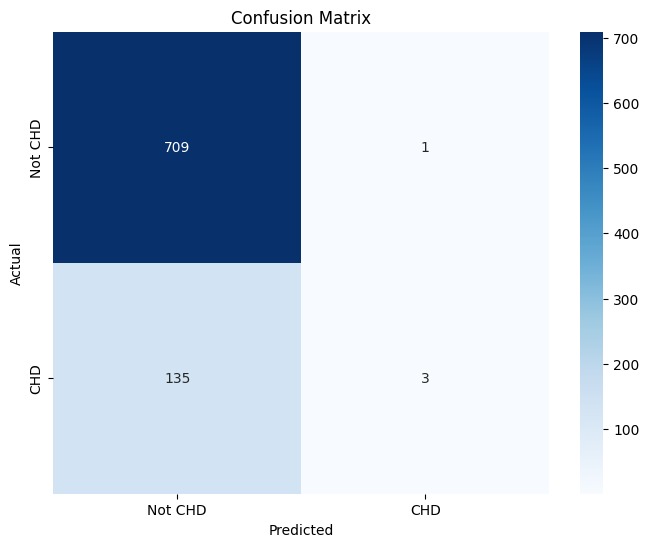

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       710
           1       0.75      0.02      0.04       138

    accuracy                           0.84       848
   macro avg       0.80      0.51      0.48       848
weighted avg       0.83      0.84      0.77       848

Accuracy Score: 0.84


In [30]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
# Compute the confusion matrix
cm = confusion_matrix(y_test, knn_predicted)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Not CHD', 'CHD'], columns=['Not CHD', 'CHD'])

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Print classification report
print("Classification Report:")
print(classification_report(y_test, knn_predicted))

# Print accuracy score
print(f"Accuracy Score: {accuracy_score(y_test, knn_predicted):.2f}")


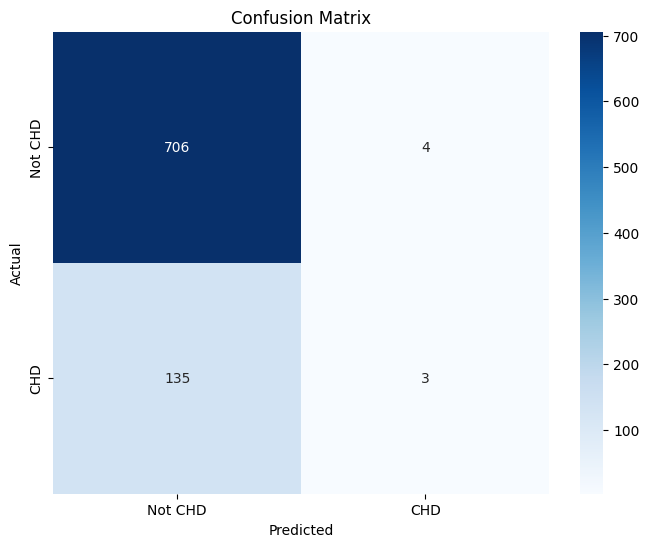

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       710
           1       0.43      0.02      0.04       138

    accuracy                           0.84       848
   macro avg       0.63      0.51      0.48       848
weighted avg       0.77      0.84      0.77       848

Accuracy Score: 0.84


In [34]:

m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
cm = confusion_matrix(y_test, dt_predicted)
# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Not CHD', 'CHD'], columns=['Not CHD', 'CHD'])

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Print classification report
print("Classification Report:")
print(classification_report(y_test, dt_predicted))

# Print accuracy score
print(f"Accuracy Score: {accuracy_score(y_test, dt_predicted):.2f}")

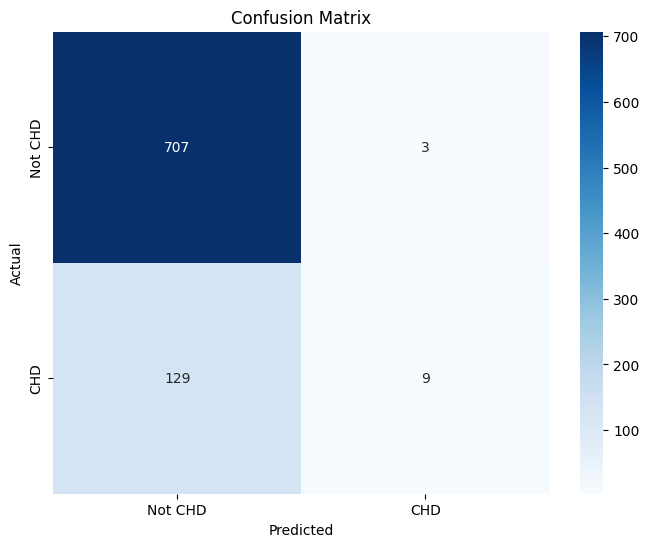

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.91       710
           1       0.75      0.07      0.12       138

    accuracy                           0.84       848
   macro avg       0.80      0.53      0.52       848
weighted avg       0.83      0.84      0.79       848

Accuracy Score: 0.84


In [37]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)

cm = confusion_matrix(y_test, svc_predicted)
# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Not CHD', 'CHD'], columns=['Not CHD', 'CHD'])

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Print classification report
print("Classification Report:")
print(classification_report(y_test, svc_predicted))

# Print accuracy score
print(f"Accuracy Score: {accuracy_score(y_test, svc_predicted):.2f}")

In [46]:
accuracy_score(y_test, svc_predicted)

0.8443396226415094

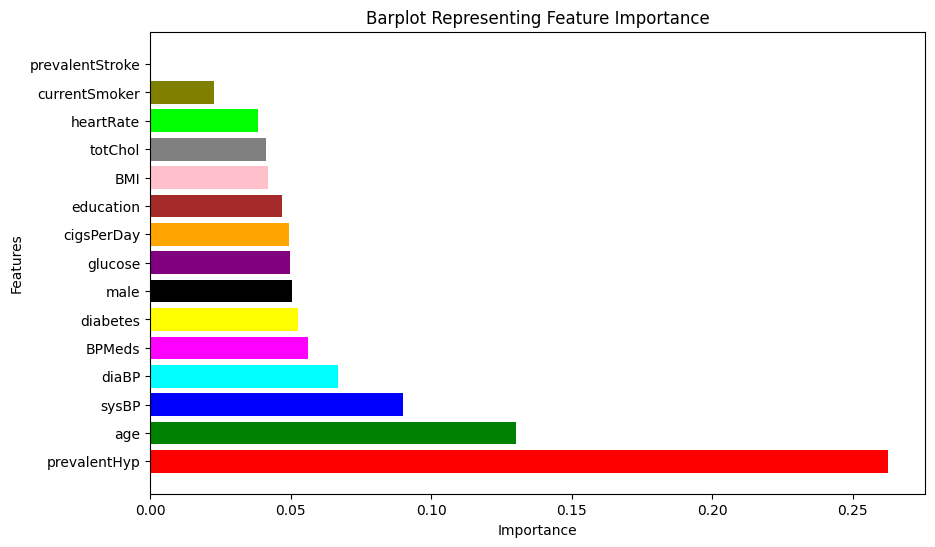

In [41]:
# Extract feature importances
feature_importances = xgb.feature_importances_

# Define the list of all features
features = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
            'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
            'diaBP', 'BMI', 'heartRate', 'glucose']

# Create DataFrame for feature importances
imp_feature = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance for better visualization
imp_feature = imp_feature.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Barplot Representing Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'brown', 'pink', 'gray', 'lime', 'olive', 'navy']
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color=colors[:len(imp_feature)])
plt.show()

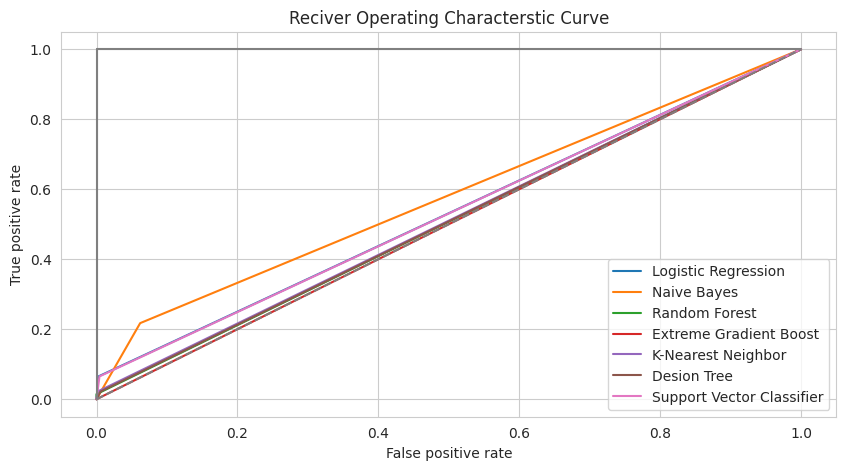

In [42]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [48]:
svc_score = accuracy_score(y_test, svc_predicted)
lr_score = accuracy_score(y_test, lr_predict)
nb_score = accuracy_score(y_test, nbpred)
rf_score = accuracy_score(y_test, rf_predicted)
xgb_score = accuracy_score(y_test, xgb_predicted)
knn_score = accuracy_score(y_test, knn_predicted)
dt_score = accuracy_score(y_test, dt_predicted)



In [49]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_score*100,
                    nb_score*100,rf_score*100,xgb_score*100,knn_score*100,dt_score*100,svc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,84.551887
1,Naive Bayes,82.075472
2,Random Forest,83.962264
3,Extreme Gradient Boost,83.726415
4,K-Nearest Neighbour,83.962264
5,Decision Tree,83.608491
6,Support Vector Machine,84.433962


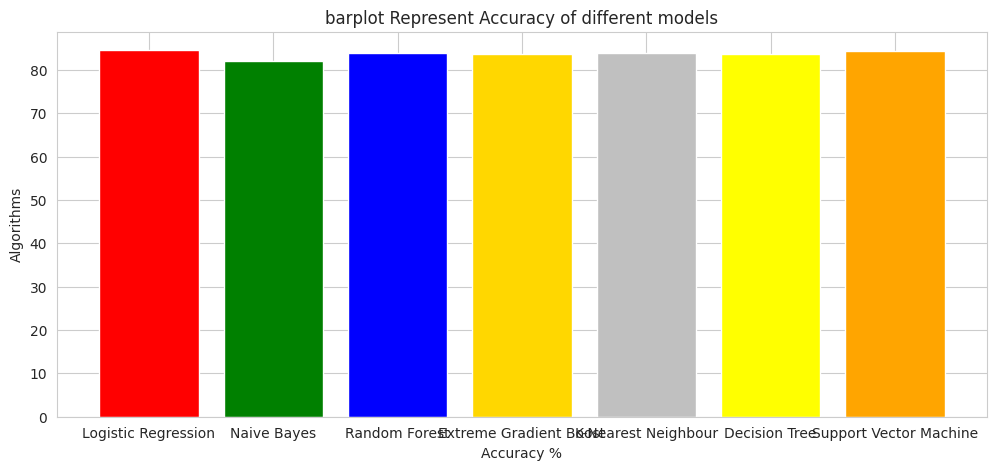

In [50]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

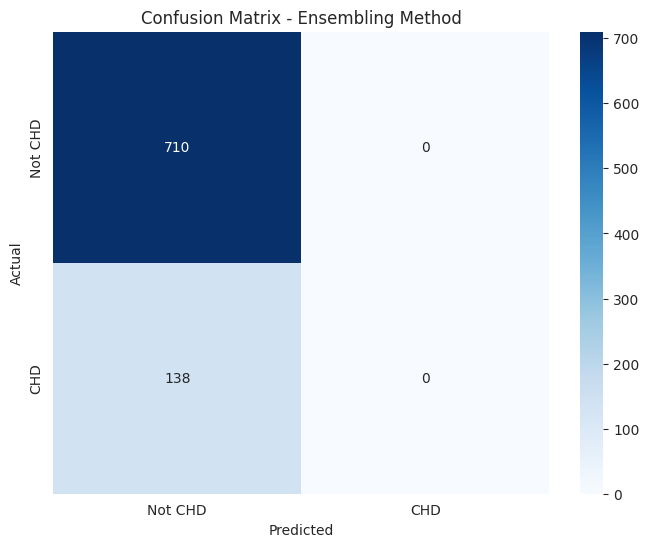

In [53]:
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
# Compute the confusion matrix
cm_xgb = confusion_matrix(y_test, scv_predicted)

# Create a DataFrame for the confusion matrix
cm_xgb_df = pd.DataFrame(cm_xgb, index=['Not CHD', 'CHD'], columns=['Not CHD', 'CHD'])

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm_xgb_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Ensembling Method')
plt.show()
